# Gods Unchained Marketplace API Documentation

Base URL: `https://immutable-marketplace.onrender.com/api`

This API provides access to Gods Unchained card marketplace data, including collections, listings, and user portfolios.

## Table of Contents

1. [Health Check](#health-check)
2. [Authentication](#authentication)
3. [Projects/Collections](#projects)
4. [Collection Details](#collection-details)
5. [Collection Filters](#collection-filters)
6. [All Stacks](#all-stacks)
7. [User NFTs](#user-nfts)
8. [Watchlists](#watchlists)

---
## 1. Health Check

Check if the API is running properly.

**Endpoint:** `/api/health`  
**Method:** GET  
**Authentication:** Not required

![Health Check Endpoint](attachment:health_check.png)

In [ ]:
# Example API Response
{
  "status": "healthy",
  "timestamp": "2026-01-13T05:42:00Z",
  "database": "connected",
  "cache": "active"
}

---
## 2. Authentication

Connect a wallet for personalized features.

**Endpoint:** `/api/auth/connect`  
**Method:** POST  
**Authentication:** Not required

![Authentication Endpoint](attachment:auth_connect.png)

In [ ]:
# Request Body
{
  "wallet_address": "0x1234567890abcdef1234567890abcdef12345678"
}

In [ ]:
# Example API Response
{
  "success": true,
  "wallet_address": "0x1234567890abcdef1234567890abcdef12345678",
  "session_token": "eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9...",
  "expires_at": "2026-01-14T05:42:00Z"
}

---
## 3. Fetching All Projects/Games

Get all available collections/projects. This is the first endpoint to be displayed/viewed by the user.

**Endpoint:** `/api/projects`  
**Method:** GET  
**Authentication:** Not required  
**Cache:** 5 minutes



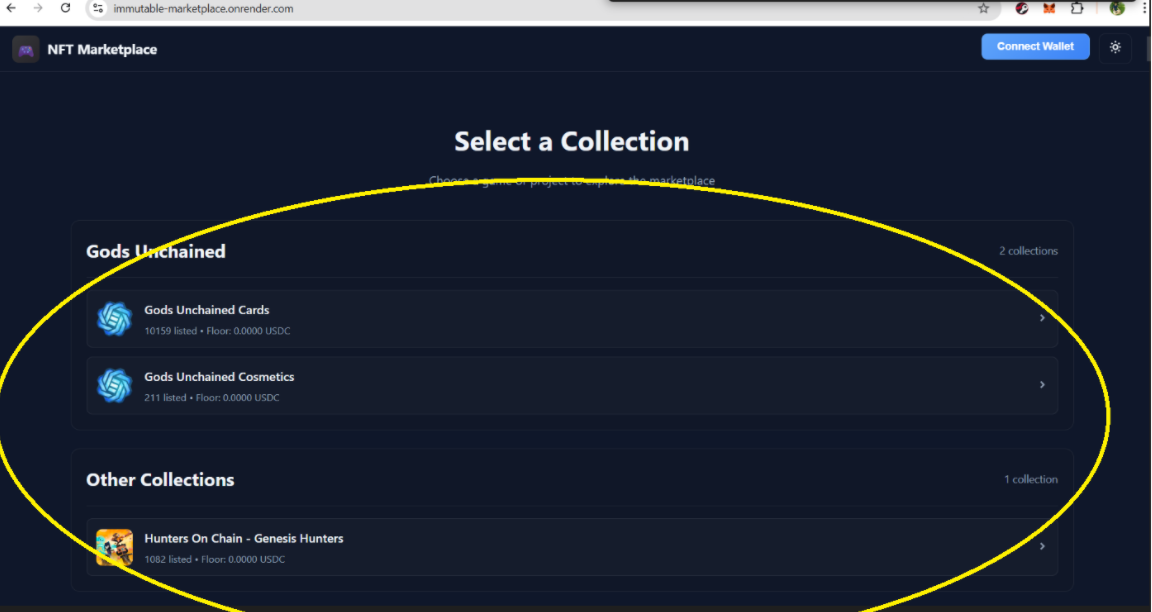

In [ ]:
# Example API Response
{
  "projects": [
    {
      "collections": [
        {
          "cards_with_listings": 10160,
          "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69",
          "floor_currency": "USDC",
          "floor_price": 9.174e-15,
          "floor_price_usd": null,
          "image": "https://images.godsunchained.com/misc/gu-sigel.png",
          "min_price": "9174",
          "name": "Gods Unchained Cards",
          "symbol": "CARD",
          "total_cards": 1547,
          "unique_card_ids": 1538
        }
      ],
      "name": "Gods Unchained"
    }
  ]
}

---
## 4. Collection Details

Get detailed information about a specific collection.

**Endpoint:** `/api/collections/{contract_address}`  
**Method:** GET  
**Authentication:** Not required  
**Cache:** 5 minutes

**Parameters:**
- `contract_address` (path, required): After mo mag click ng game/project kuning mo yung cotract address nun pre tas dito mo gamiting as parameter


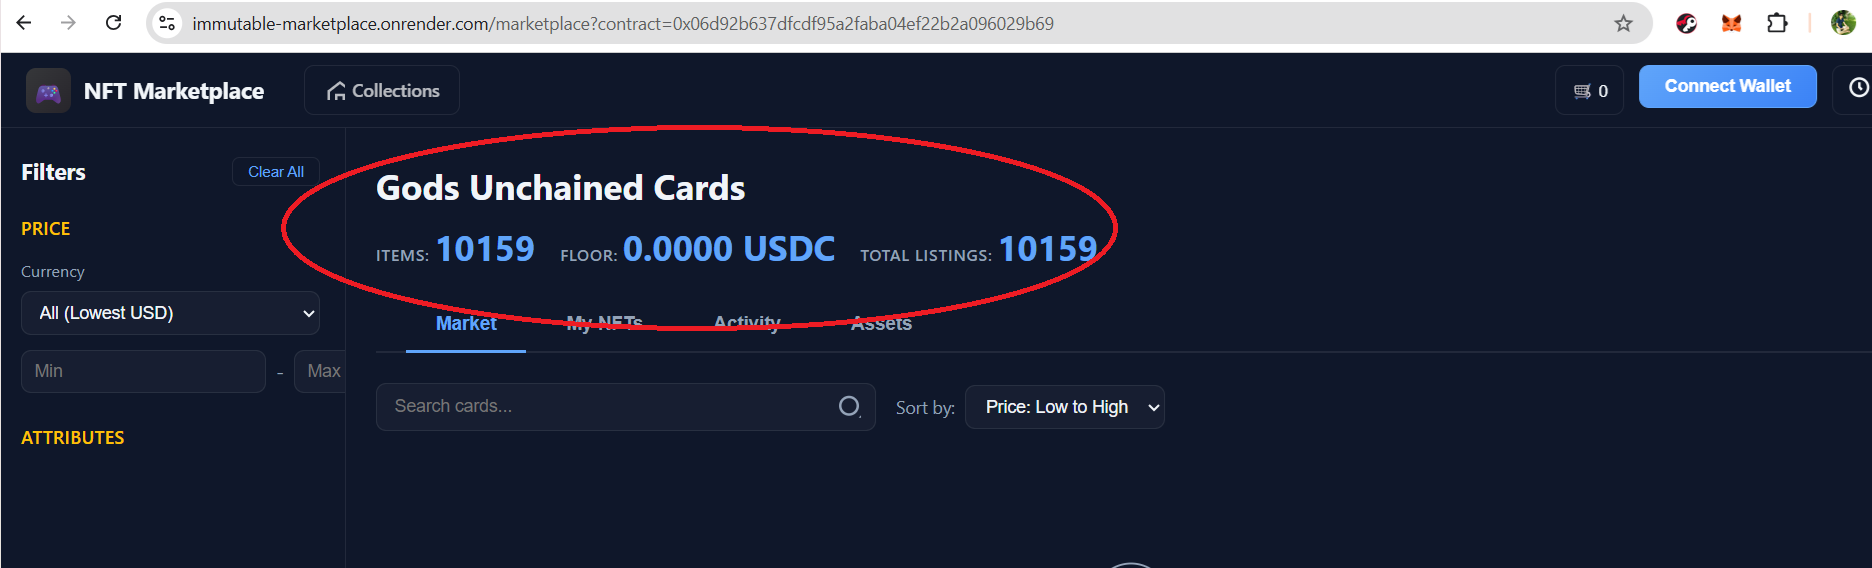

In [ ]:
# Example Request
# GET /api/collections/0x06d92b637dfcdf95a2faba04ef22b2a096029b69

In [ ]:
# Example API Response
{
  "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69",
  "name": "Gods Unchained Cards",
  "symbol": "CARD",
  "image": "https://images.godsunchained.com/misc/gu-sigel.png",
  "total_cards": 1547,
  "unique_card_ids": 1538,
  "cards_with_listings": 10160,
  "floor_price": 9.174e-15,
  "floor_currency": "USDC",
  "min_price": "9174",
  "description": "Collectible trading cards from the Gods Unchained game"
}

---
## 5. Collection Filters

Get available filter options for a collection (currencies, attributes, etc.).

**Endpoint:** `/api/collections/{contract_address}/filters`  
**Method:** GET  
**Authentication:** Not required  
**Cache:** 5 minutes

**Parameters:**
- `contract_address` (path, required): The contract address of the collection

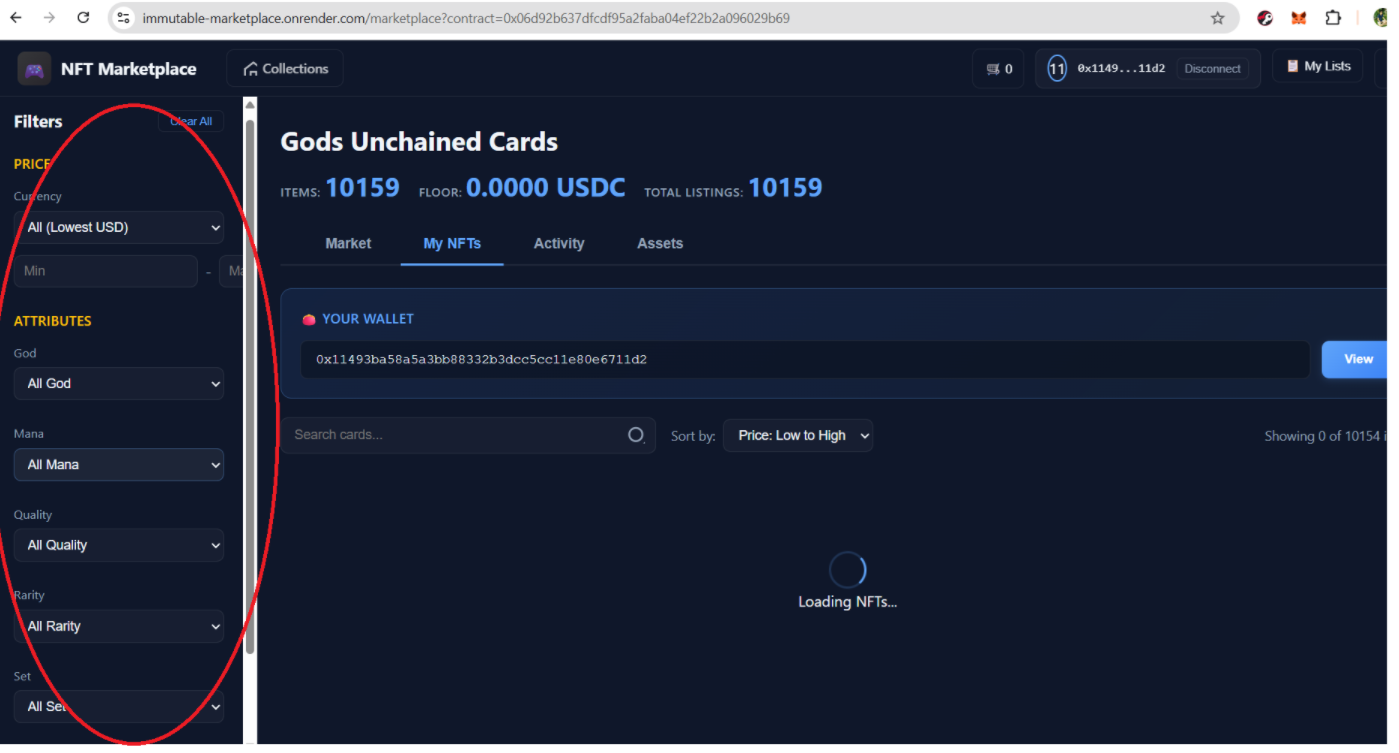

In [ ]:
# Example Request
# GET /api/collections/0x06d92b637dfcdf95a2faba04ef22b2a096029b69/filters

In [ ]:
# Example API Response
{
  "currencies": [
    "ETH",
    "USDC",
    "GODS",
    "IMX"
  ],
  "attributes": {
    "god": [
      "Deception",
      "Light",
      "Nature",
      "Death",
      "Magic",
      "War"
    ],
    "rarity": [
      "Common",
      "Rare",
      "Epic",
      "Legendary",
      "Mythic"
    ],
    "quality": [
      "Meteorite",
      "Shadow",
      "Gold",
      "Diamond"
    ],
    "type": [
      "Creature",
      "Spell",
      "Weapon"
    ]
  },
  "price_range": {
    "min": 0.000009174,
    "max": 1500.0
  }
}


## 6. All Stacks (NFT Listings)

Get all NFT listings for a collection with optional filtering.

**Endpoint:** `/api/collections/{contract_address}/all-stacks`  
**Method:** GET  
**Authentication:** Not required  
**Cache:** 2 minutes

**Parameters:**
- `contract_address` (path, required): The contract address of the collection
- `currency` (query, optional): Filter by currency (ETH, USDC, GODS, IMX)
- `min_price` (query, optional): Minimum price filter
- `max_price` (query, optional): Maximum price filter
- `god` (query, optional): Filter by god attribute
- `rarity` (query, optional): Filter by rarity
- `quality` (query, optional): Filter by quality
- `type` (query, optional): Filter by card type

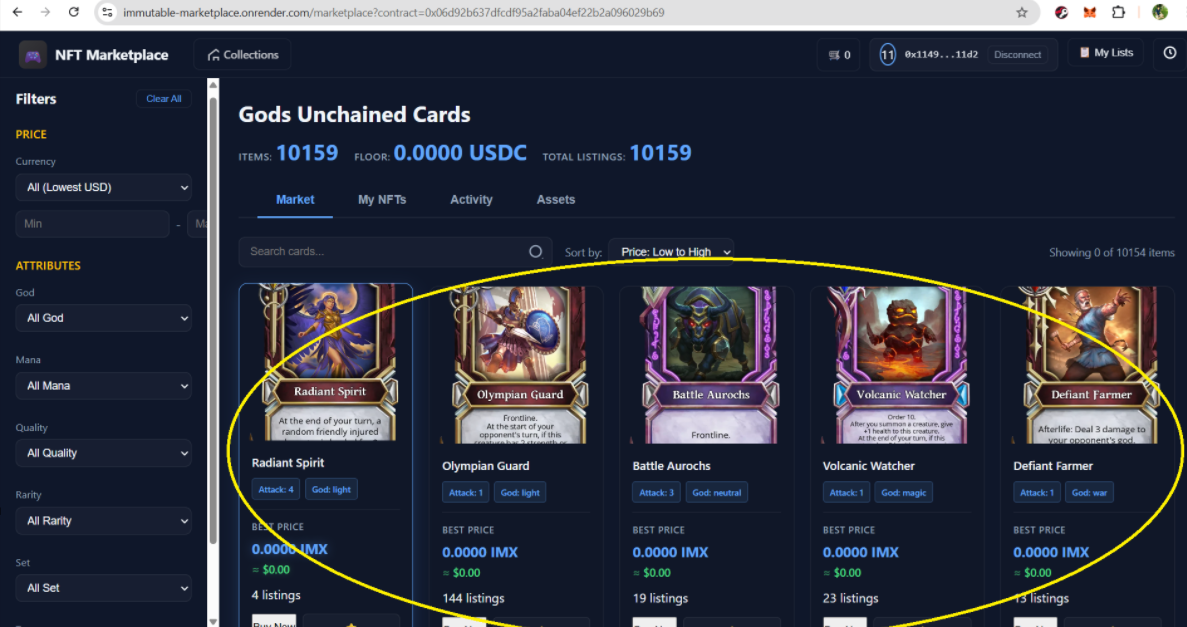

In [ ]:
# Example Request
# GET /api/collections/0x06d92b637dfcdf95a2faba04ef22b2a096029b69/all-stacks?currency=USDC&rarity=Legendary

In [ ]:
# Example API Response
{
  "stacks": [
    {
      "token_id": "123456",
      "name": "Atlas, the Titan",
      "image": "https://images.godsunchained.com/card/123456.png",
      "price": 25.50,
      "currency": "USDC",
      "price_usd": 25.50,
      "seller": "0xabcdef...",
      "listing_id": "order_789",
      "metadata": {
        "god": "Light",
        "rarity": "Legendary",
        "quality": "Meteorite",
        "type": "Creature",
        "mana": 8,
        "attack": 7,
        "health": 7
      }
    }
  ],
  "total_count": 1250,
  "filtered_count": 42
}

## 7. User NFT Portfolio

Get all NFTs owned by a specific wallet address.

**Endpoint:** `/api/users/{address}/nfts`  
**Method:** GET  
**Authentication:** Optional (required for private data)

**Parameters:**
- `wallet_address` (path, required): The user's wallet address
**Query params**
- `contract` (query, required): Filter by collection contract address
- `wallet` (query, required): Alternative wallet address to view (overrides path parameter)

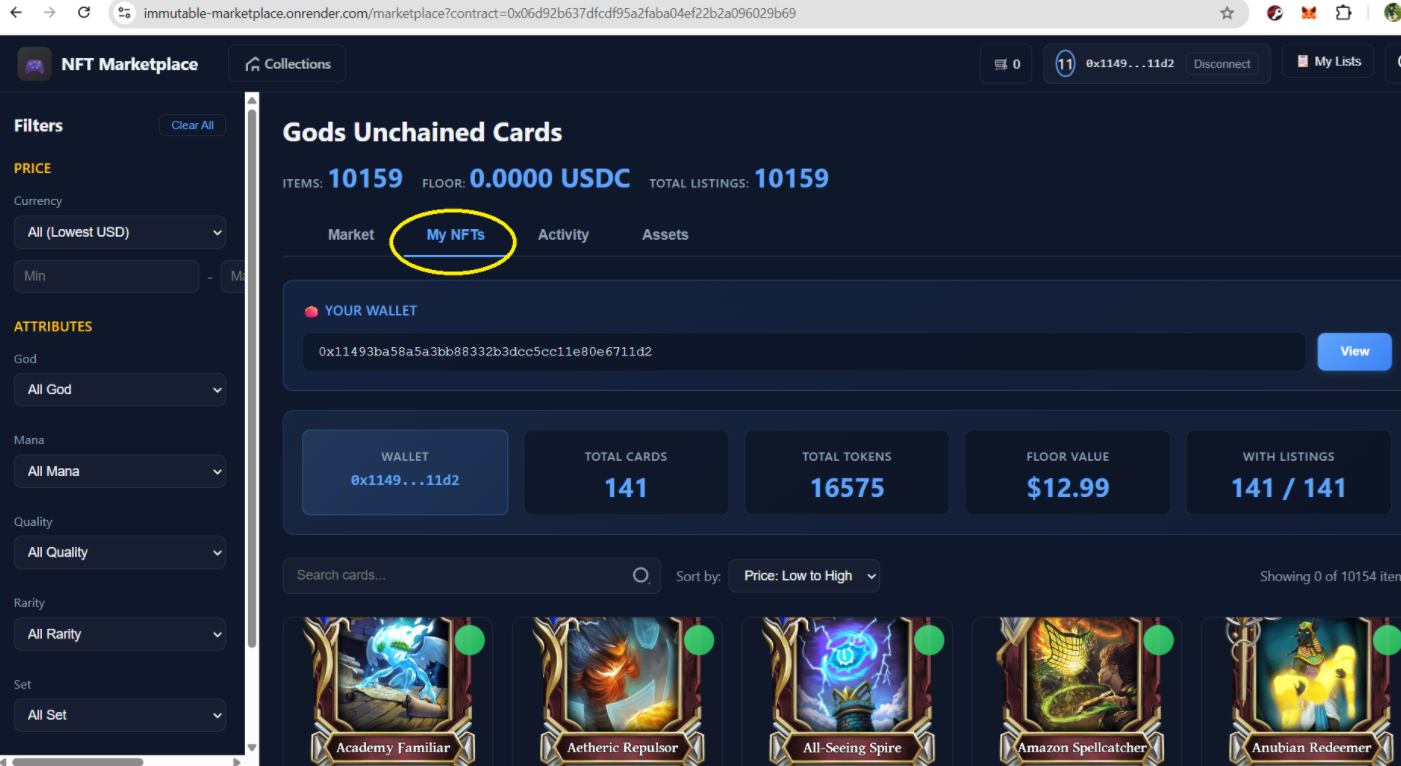

In [ ]:
# Example Request
# GET /api/users/0x1234567890abcdef1234567890abcdef12345678/nfts

In [ ]:
# Example API Response
{
  "stacks": [
    {
      "metadata_id": "12345",
      "name": "Atlas, the Titan",
      "description": "A powerful legendary creature",
      "image": "https://images.godsunchained.com/card/12345.png",
      "item_type": "creature",
      "rarity": "legendary",
      "attributes": {
        "god": "Light",
        "mana": 8,
        "attack": 7,
        "health": 7,
        "type": "Olympian",
        "set": "Genesis"
      },
      
      "token_ids": ["501234", "501235", "501236"],
      "quantity": 3,
      
      "total_listings": 42,
      "all_prices": {
        "USDC": {
          "price": 25.50,
          "listing_id": "order_abc123",
          "usd": 25.50
        },
        "ETH": {
          "price": 0.015,
          "listing_id": "order_def456",
          "usd": 27.30
        },
        "GODS": {
          "price": 150.0,
          "listing_id": "order_ghi789",
          "usd": 26.00
        }
      },
      "best_currency": "USDC",
      "best_usd_price": 25.50,
      "last_sold_price": 28.00,
      "real_value": 28.00,
      "total_floor_value": 76.50
    }
  ],
  
  "stats": {
    "total_unique_cards": 247,
    "total_tokens": 523,
    "total_floor_value_usd": 1853.42,
    "cards_with_listings": 198,
    "cards_without_listings": 49
  },
  
  "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69",
  "wallet_address": "0x1234567890abcdef1234567890abcdef12345678"
}


## 8. Watchlists Management - Kahit wag na muna e implement. Lagay lng ng div/placeholder

### 8.1 Get All Watchlists

Retrieve all watchlists for a user.

**Endpoint:** `/api/users/{wallet_address}/lists`  
**Method:** GET  
**Authentication:** Required

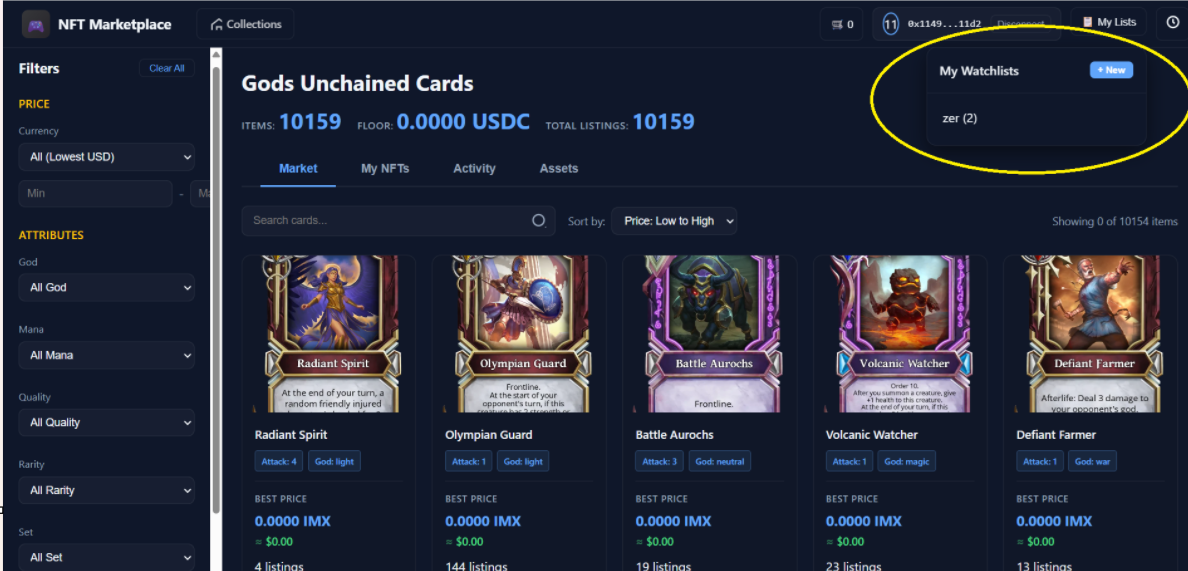

In [ ]:
# Example Request
# GET /api/users/0x1234567890abcdef1234567890abcdef12345678/lists

In [ ]:
# Example API Response
{
  "watchlists": [
    {
      "id": "wl_123456",
      "name": "Legendary Cards",
      "description": "My collection of legendary cards",
      "item_count": 15,
      "created_at": "2026-01-01T12:00:00Z",
      "updated_at": "2026-01-10T15:30:00Z"
    },
    {
      "id": "wl_789012",
      "name": "Budget Picks",
      "description": "Affordable cards under $10",
      "item_count": 42,
      "created_at": "2026-01-05T09:20:00Z",
      "updated_at": "2026-01-12T11:45:00Z"
    }
  ],
  "total_lists": 2
}

### 8.2 Create Watchlist 
### - Yung idea dito is pwede gumawa yung user ng list ng cards na gusto nila. Select lang sila ng card/cards then name of that list.

Create a new watchlist for a user.

**Endpoint:** `/api/users/{wallet_address}/lists`  
**Method:** POST  
**Authentication:** Required



In [ ]:
# Request Body
{
  "name": "Investment Portfolio",
  "description": "High-value cards for long-term holding"
}

In [ ]:
# Example API Response
{
  "success": true,
  "watchlist": {
    "id": "wl_345678",
    "name": "Investment Portfolio",
    "description": "High-value cards for long-term holding",
    "item_count": 0,
    "created_at": "2026-01-13T05:42:00Z",
    "updated_at": "2026-01-13T05:42:00Z"
  }
}

### 8.3 Get Watchlist Items

Get all items in a specific watchlist.

**Endpoint:** `/api/lists/{list_id}/items`  
**Method:** GET  
**Authentication:** Required

![Get Watchlist Items Endpoint](attachment:get_watchlist_items.png)

In [ ]:
# Example Request
# GET /api/lists/wl_123456/items

In [ ]:
# Example API Response
{
  "list_id": "wl_123456",
  "list_name": "Legendary Cards",
  "items": [
    {
      "token_id": "123456",
      "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69",
      "name": "Atlas, the Titan",
      "image": "https://images.godsunchained.com/card/123456.png",
      "current_price": 25.50,
      "currency": "USDC",
      "added_at": "2026-01-05T10:30:00Z",
      "price_when_added": 22.00,
      "price_change_percent": 15.91
    }
  ],
  "total_items": 15
}

### 8.4 Add Item to Watchlist

Add an NFT to a watchlist.

**Endpoint:** `/api/lists/{list_id}/items`  
**Method:** POST  
**Authentication:** Required

![Add Watchlist Item Endpoint](attachment:add_watchlist_item.png)

In [ ]:
# Request Body
{
  "token_id": "789012",
  "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69"
}

In [ ]:
# Example API Response
{
  "success": true,
  "message": "Item added to watchlist",
  "item": {
    "token_id": "789012",
    "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69",
    "name": "Demogorgon",
    "added_at": "2026-01-13T05:42:00Z",
    "current_price": 45.00,
    "currency": "USDC"
  }
}

### 8.5 Remove Item from Watchlist

Remove an NFT from a watchlist.

**Endpoint:** `/api/lists/{list_id}/items`  
**Method:** DELETE  
**Authentication:** Required

![Remove Watchlist Item Endpoint](attachment:remove_watchlist_item.png)

In [ ]:
# Request Body
{
  "token_id": "789012",
  "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69"
}

In [ ]:
# Example API Response
{
  "success": true,
  "message": "Item removed from watchlist"
}

### 8.6 Delete Watchlist

Delete an entire watchlist.

**Endpoint:** `/api/lists/{list_id}`  
**Method:** DELETE  
**Authentication:** Required

![Delete Watchlist Endpoint](attachment:delete_watchlist.png)

In [ ]:
# Example Request
# DELETE /api/lists/wl_123456

In [ ]:
# Example API Response
{
  "success": true,
  "message": "Watchlist deleted successfully"
}

### 8.7 Check if Item in Watchlist

Check if a specific NFT is in a watchlist.

**Endpoint:** `/api/lists/{list_id}/items/check`  
**Method:** POST  
**Authentication:** Required

![Check Watchlist Item Endpoint](attachment:check_watchlist_item.png)

In [ ]:
# Request Body
{
  "token_id": "123456",
  "contract_address": "0x06d92b637dfcdf95a2faba04ef22b2a096029b69"
}

In [ ]:
# Example API Response
{
  "exists": true,
  "added_at": "2026-01-05T10:30:00Z",
  "price_when_added": 22.00
}

---
## Error Handling

The API uses standard HTTP status codes and returns errors in the following format:

![Error Response Format](attachment:error_format.png)

In [ ]:
# Error Response Format
{
  "error": "Error message description",
  "status_code": 400,
  "timestamp": "2026-01-13T05:42:00Z"
}

### Common Error Codes

| Status Code | Meaning | Description |
|-------------|---------|-------------|
| 200 | OK | Request successful |
| 400 | Bad Request | Invalid request parameters |
| 401 | Unauthorized | Authentication required |
| 403 | Forbidden | Access denied |
| 404 | Not Found | Resource not found |
| 429 | Too Many Requests | Rate limit exceeded |
| 500 | Internal Server Error | Server error |
| 503 | Service Unavailable | Service temporarily unavailable |

---
## Rate Limiting

The API implements rate limiting to ensure fair usage:

- **Development:** 60 requests per hour
- **Production:** 300 requests per day

Rate limit information is included in response headers:
- `X-RateLimit-Limit`: Maximum requests allowed
- `X-RateLimit-Remaining`: Requests remaining
- `X-RateLimit-Reset`: Time when the limit resets

---
## Caching Strategy

The API uses server-side caching to improve performance:

| Endpoint | Cache Duration |
|----------|----------------|
| `/api/projects` | 5 minutes |
| `/api/collections/{contract}` | 5 minutes |
| `/api/collections/{contract}/filters` | 5 minutes |
| `/api/collections/{contract}/all-stacks` | 2 minutes |
| User-specific endpoints | No cache |

Cache headers are included in responses:
- `Cache-Control`: Cache directives
- `Age`: Time since response was generated
- `Expires`: Expiration time

---
## Best Practices

1. **Use Caching:** Leverage cached endpoints for frequently accessed data
2. **Implement Pagination:** For large datasets, implement pagination on the client side
3. **Handle Errors:** Always implement proper error handling
4. **Rate Limit Awareness:** Monitor rate limit headers and implement backoff strategies
5. **Filter Efficiently:** Use query parameters to filter data on the server side
6. **Secure Authentication:** Store authentication tokens securely
7. **Monitor Performance:** Track API response times and optimize accordingly

---
## Support & Contact

For API support, questions, or feature requests:

- **API Base URL:** `https://immutable-marketplace.onrender.com/api`
- **Documentation:** This notebook
- **Status Page:** Check API health at `/api/health`

---

*Last Updated: January 13, 2026*